In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
df=pd.read_csv("/workspace/viransh/data.csv")
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [41]:
classes=['Hate Speech','Offensive Language','None']

df.drop(['count','hate_speech','offensive_language','neither','Unnamed: 0'],axis=1,inplace=True)

In [42]:
df.head()

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [43]:
df.shape

(24783, 2)

Hate Speech  :  1430
Offensive Language  :  19190
None  :  4163


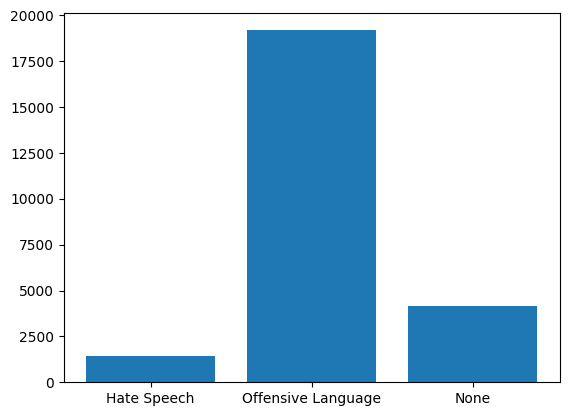

In [44]:
labels=df['class']
unique,counts =np.unique(labels, return_counts=True)
values=list(zip(unique, counts))
plt.bar(classes,counts)
for i in values:
    print(classes[i[0]],' : ',i[1])
plt.show()

In [45]:
hate_tweets=df[df['class']==0]
offensive_tweets=df[df['class']==1]
neither=df[df['class']==2]

print(hate_tweets.shape)
print(offensive_tweets.shape)
print(neither.shape)

(1430, 2)
(19190, 2)
(4163, 2)


In [46]:
for i in range(3):
    hate_tweets=pd.concat([hate_tweets,hate_tweets],ignore_index=True)
    
neither=pd.concat([neither,neither,neither],ignore_index=True)
offensive_tweets=offensive_tweets.iloc[0:12000,:]

print(hate_tweets.shape)
print(offensive_tweets.shape)
print(neither.shape)

(11440, 2)
(12000, 2)
(12489, 2)


In [47]:
df=pd.concat([hate_tweets,offensive_tweets,neither],ignore_index=True)
df.shape


(35929, 2)

Hate Speech  :  11440
Offensive Language  :  12000
None  :  12489


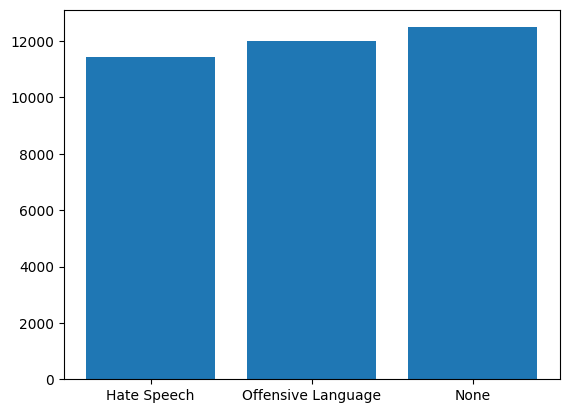

In [48]:
labels=df['class']
unique,counts=np.unique(labels,return_counts=True)

values=list(zip(unique,counts))
plt.bar(classes,counts)
for i in values:
    print(classes[i[0]],' : ', i[1])
plt.show()

In [61]:
import nltk

nltk.download['omw-1.4']
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

import re

nltk.download('wordnet')
nltk.download('stopwords')

AttributeError: module 'numpy' has no attribute 'typeDict'

In [33]:
d={'luv':'love','wud':'would', 'lyk':'like', 'wateva':'whatever', 'ttyl':'talk to you later', 'kul':'cool', 'fyn':'fine', 'omg':'oh my god!','fam':'family','bruh':'brother','cud':'could','fud':'food','u':'you','ur':'your','bday':'birthday','bihday':'birthday' }



In [50]:
stop_words = set(stopwords.words("english"))
stop_words.add('rt')
stop_words.remove('not')
lemmatizer = WordNetLemmatizer()
giant_url_regex = ('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|' '[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
mention_regex = '@[\w\-]+'

def clean_text(text):
    text = re.sub('"', "", text)
    text = re.sub(mention_regex, ' ',text) #removing all user names
    text = re.sub(giant_url_regex, ' ', text)  #remocing the urls
    text = text.lower()
    text = re.sub("hm+", "", text) #removing variants of hmmm
    text = re.sub("[^a-z]+", " ", text) #removing all numbers, special chars like @,#,? etc
    text = text.split()
    text = [word for word in text if not word in stop_words]
    text = [d[word] if word in d else word for word in text]  #replacing some slangs
    text = [lemmatizer.lemmatize(token) for token in text]
    text = [lemmatizer.lemmatize(token, "v") for token in text]
    text = " ".join(text)
    return text

NameError: name 'stopwords' is not defined

In [51]:
df['processed_tweets']=df.tweet.apply(lambda x: clean_text(x))

df.head()

NameError: name 'clean_text' is not defined

In [52]:
x=df.processed_tweets
y=df['class']
print(x.shape)
print(y.shape)

AttributeError: 'DataFrame' object has no attribute 'processed_tweets'

In [54]:
word_unique=[]

for i in x:
    for j in i.split():
        word_unique.append(j)
        
unique,counts=np.unique(word_unique,return_counts=True)
print("TOTAL WORDS IN THE TWEET ARE : ",len(word_unique))
print("TOTAL UNIQUE WORDS IN THE TWEET ARE : ",len(unique))
    

NameError: name 'x' is not defined

In [55]:
tweet_length=[]
for i in x:
    tweets_length.append(len(i.split()))
print("Average length tweets are: ", np.mean(tweets_length))
print("The max length of tweet is : ",np.max(tweets_length))
print("The min length of tweets is : ", np.min(tweets_length))

NameError: name 'x' is not defined

In [58]:
tweets_length=pd.DataFrame(tweets_length)
tweets_length.describe()

NameError: name 'tweets_length' is not defined